# Aluminum silicon binary system

In [2]:
import matplotlib.pyplot as plt
import os
from pycalphad import Database, Workspace, as_property
from pycalphad import variables as v

## get thermodynamic data

In [3]:
tdbpath = os.path.join("AlSi98.TDB")
db_AlSi = Database(tdbpath)
comps = ['AL', 'SI', 'VA']
phases = ['FCC_A1', 'DIAMOND_A4', 'LIQUID']

# cálculo de equilibrio

In [4]:
conditions = {
    v.X('SI'): 0.1,
    v.T: (600, 1800, 1),
    v.P: 1e5,
    v.N: 1
}

In [5]:
wks = Workspace(
    database = db_AlSi,
    components = comps,
    phases = phases,
    conditions = conditions
)

## post-processing

### phase partition plot

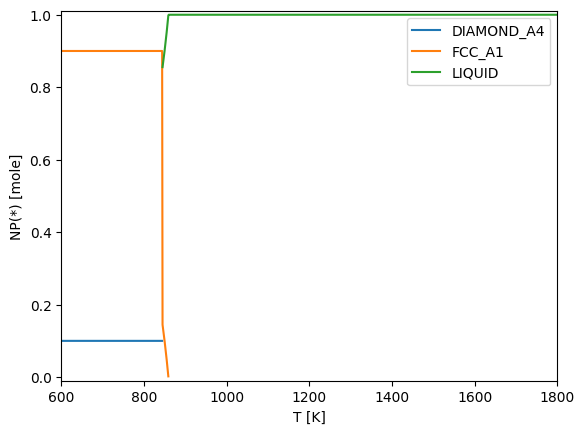

In [6]:
fig, ax = plt.subplots()

x = wks.get(v.T)
for phase in wks.phases:
    y = wks.get(f"NP({phase})")
    ax.plot(x, y, label=f"{phase}")
ax.set_xlabel("T [K]")
ax.set_ylabel("NP(*) [mole]")
ax.set_xlim(600, 1800)
ax.set_ylim(-0.01, 1.01)
ax.legend()
plt.show()

### Cp plot

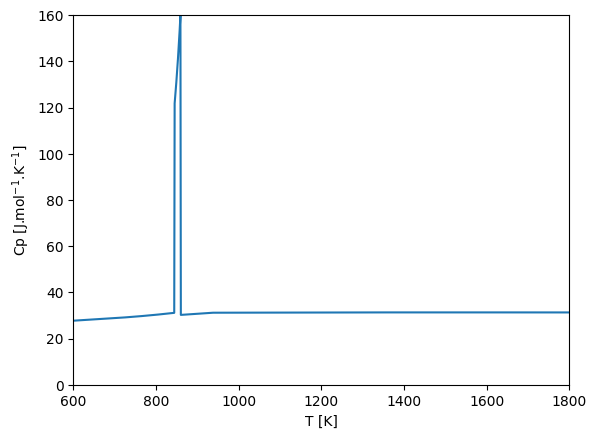

In [7]:
heat_capacity = as_property("HM.T")

fig, ax = plt.subplots()

x = wks.get(v.T)
y = wks.get(heat_capacity)
ax.plot(x, y)
ax.set_xlabel("T [K]")
ax.set_ylabel(r"Cp [J.mol$^{-1}$.K$^{-1}$]")
ax.set_xlim(600, 1800)
ax.set_ylim(0, 160)
plt.show()

### Enthalpy plot

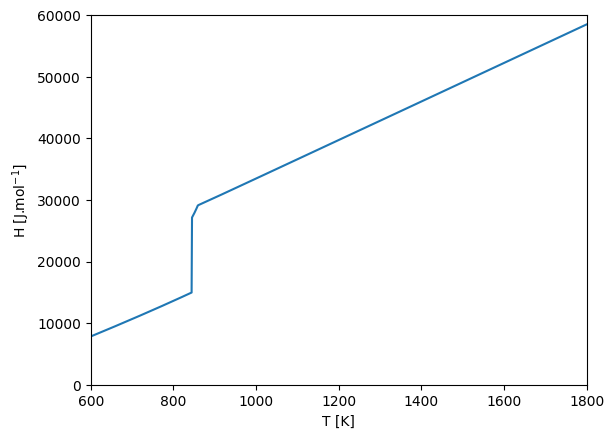

In [8]:
fig, ax = plt.subplots()

x = wks.get(v.T)
y = wks.get("HM")
ax.plot(x, y)
ax.set_xlabel("T [K]")
ax.set_ylabel(r"H [J.mol$^{-1}$]")
ax.set_xlim(600, 1800)
ax.set_ylim(0, 60000)
plt.show()

### GM plot

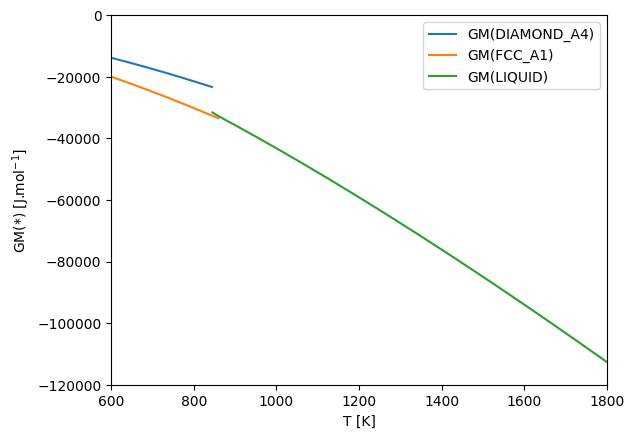

In [9]:
fig, ax = plt.subplots()

x = wks.get(v.T)

for phase in wks.phases:
    y = wks.get(f"GM({phase})")
    ax.plot(x, y, label=f"GM({phase})")
ax.set_xlabel("T [K]")
ax.set_ylabel(r"GM(*) [J.mol$^{-1}$]")
ax.set_xlim(600, 1800)
ax.set_ylim(-120000, 0)
ax.legend()
plt.show()